<a href="https://colab.research.google.com/github/R-i-d-o-r/FAW-AI-BINARY-MODEL/blob/Metrics/PIPELINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cloning  repo
!git clone https://github.com/the-Soke/FAW-AI-BINARY-MODEL.git

# Moving  into the project directory
%cd FAW-AI-BINARY-MODEL
!ls


Cloning into 'FAW-AI-BINARY-MODEL'...
remote: Enumerating objects: 1359, done.
remote: Total 1359 (delta 0), reused 0 (delta 0), pack-reused 1359 (from 1)
Receiving objects: 100% (1359/1359), 181.07 MiB | 32.94 MiB/s, done.
Resolving deltas: 100% (91/91), done.
/content/FAW-AI-BINARY-MODEL
armyWorm  non_FAW


In [ ]:
import os
import shutil
import random
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import numpy as np


In [ ]:

data_dir = "/content/FAW-AI-BINARY-MODEL"


split_dir = "/content/FAW-AI-BINARY-MODEL/dataset_split"
train_dir = os.path.join(split_dir, 'train')
val_dir = os.path.join(split_dir, 'val')
test_dir = os.path.join(split_dir, 'test')


for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d, exist_ok=True)
    os.makedirs(os.path.join(d, 'armyWorm'), exist_ok=True)
    os.makedirs(os.path.join(d, 'non_FAW'), exist_ok=True)


train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Loop through both classes and split
for cls in ['armyWorm', 'non_FAW']:
    src_folder = os.path.join(data_dir, cls)
    images = os.listdir(src_folder)
    random.shuffle(images)

    n_total = len(images)
    n_train = int(train_ratio * n_total)
    n_val = int(val_ratio * n_total)

    train_imgs = images[:n_train]
    val_imgs = images[n_train:n_train+n_val]
    test_imgs = images[n_train+n_val:]

    for img_list, dest in [(train_imgs, train_dir), (val_imgs, val_dir), (test_imgs, test_dir)]:
        for img in img_list:
            shutil.copy(os.path.join(src_folder, img), os.path.join(dest, cls, img))

print("✅ Dataset split complete.")


✅ Dataset split complete.


In [ ]:
def count_images(directory):
    counts = {}
    for cls in ['armyWorm', 'non_FAW']:
        path = os.path.join(directory, cls)
        counts[cls] = len(os.listdir(path))
    return counts

print("Train counts:", count_images(train_dir))
print("Val counts:", count_images(val_dir))
print("Test counts:", count_images(test_dir))


Train counts: {'armyWorm': 869, 'non_FAW': 83}
Val counts: {'armyWorm': 248, 'non_FAW': 23}
Test counts: {'armyWorm': 125, 'non_FAW': 13}


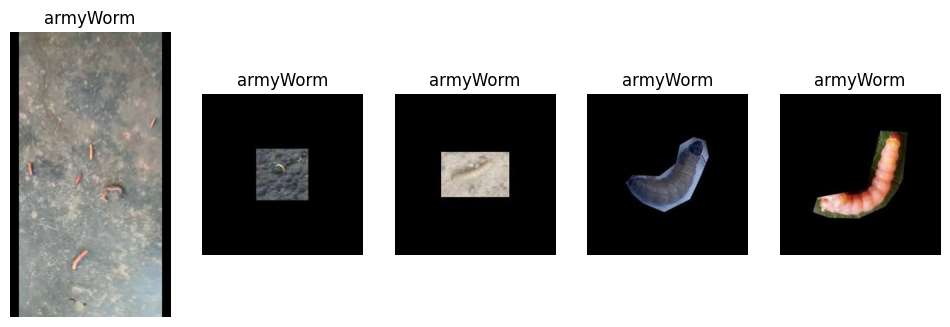

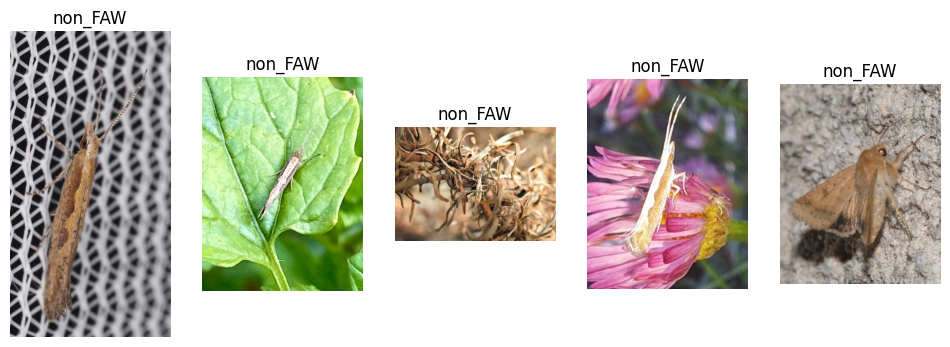

In [ ]:
import matplotlib.image as mpimg

def show_samples(directory, cls, n=5):
    files = os.listdir(os.path.join(directory, cls))[:n]
    plt.figure(figsize=(12, 4))
    for i, file in enumerate(files):
        img = mpimg.imread(os.path.join(directory, cls, file))
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.show()

show_samples(train_dir, 'armyWorm', 5)
show_samples(train_dir, 'non_FAW', 5)


In [ ]:
!ls /content


FAW-AI-BINARY-MODEL  sample_data


In [ ]:
!ls /content/FAW-AI-BINARY-MODEL


armyWorm  dataset_split  non_FAW


In [ ]:
train_dir = '/content/FAW-AI-BINARY-MODEL'
val_dir = '/content/FAW-AI-BINARY-MODEL'  # if no separate validation folder


In [ ]:
import os
print(os.listdir(train_dir))


['dataset_split', 'armyWorm', '.git', 'non_FAW']


In [ ]:
!rm -rf /content/FAW-AI-BINARY-MODEL/.git


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

image_datasets = {
    'train': datasets.ImageFolder(train_dir, data_transforms['train']),
    'val': datasets.ImageFolder(val_dir, data_transforms['val'])
}

dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=32, shuffle=True),
    'val': DataLoader(image_datasets['val'], batch_size=32, shuffle=False)
}

print("Classes:", image_datasets['train'].classes)
print(f"Train batches: {len(dataloaders['train'])}, Val batches: {len(dataloaders['val'])}")


Classes: ['armyWorm', 'dataset_split', 'non_FAW']
Train batches: 86, Val batches: 86


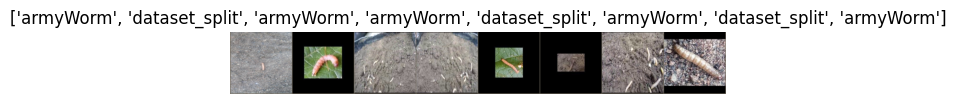

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Helper function to show images
def imshow(inp, title=None):
    """Display tensor as image."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean  # unnormalize
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')

# Getng a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs[:8])  # show first 8 images

# Displaying the images
imshow(out, title=[image_datasets['train'].classes[x] for x in classes[:8]])


### **Implementing baseline ResNet18 in Colab, log accuracy/loss per epoch, unfreezing layers, tune learning rate, batch size, and epochs, and run experiments.**

In [ ]:

!pip install torch torchvision onnx

# Imports
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 78.3 MB/s eta 0:00:00


In [ ]:
train_dir = '/content/FAW-AI-BINARY-MODEL/dataset_split/train'
val_dir = '/content/FAW-AI-BINARY-MODEL/dataset_split/val'

# Data augmentations & preprocessing
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ]),
}


In [ ]:
import os

print("Classes in train_dir:", os.listdir(train_dir))  # should list class folders like 'armyWorm', 'non_FAW', no 'FAW' if that doesn't exist

for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    if os.path.isdir(cls_path):
        files = os.listdir(cls_path)
        print(f"Class '{cls}' has {len(files)} files")
        print(f"Sample files: {files[:5]}")


Classes in train_dir: ['FAW', 'armyWorm', 'non_FAW']
Class 'FAW' has 0 files
Sample files: []
Class 'armyWorm' has 869 files
Sample files: ['video_0.mp4._frame_426.jpg', '814.jpg', '667.jpg', '356.jpg', '205.jpg']
Class 'non_FAW' has 83 files
Sample files: ['Plutella_xylostella_34.jpg', 'Plutella_xylostella_26.jpg', 'Plutella_xylostella_5.jpg', 'Plutella_xylostella_36.jpg', 'Helicoverpa_armigera_30.jpg']


In [ ]:
!rm -rf /content/FAW-AI-BINARY-MODEL/dataset_split/train/FAW


In [ ]:
import os

print("Classes in train_dir:", os.listdir(train_dir))  # should list class folders like 'armyWorm', 'non_FAW', no 'FAW' if that doesn't exist

for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    if os.path.isdir(cls_path):
        files = os.listdir(cls_path)
        print(f"Class '{cls}' has {len(files)} files")
        print(f"Sample files: {files[:5]}")

Classes in train_dir: ['armyWorm', 'non_FAW']
Class 'armyWorm' has 869 files
Sample files: ['video_0.mp4._frame_426.jpg', '814.jpg', '667.jpg', '356.jpg', '205.jpg']
Class 'non_FAW' has 83 files
Sample files: ['Plutella_xylostella_34.jpg', 'Plutella_xylostella_26.jpg', 'Plutella_xylostella_5.jpg', 'Plutella_xylostella_36.jpg', 'Helicoverpa_armigera_30.jpg']


In [ ]:
import os
import shutil
import random
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


original_dataset_dir = '/content/FAW-AI-BINARY-MODEL/dataset_split/train'
train_dir = '/content/FAW-AI-BINARY-MODEL/dataset_split/train_split'
val_dir = '/content/FAW-AI-BINARY-MODEL/dataset_split/val_split'


faw_path = os.path.join(original_dataset_dir, 'FAW')
if os.path.exists(faw_path) and len(os.listdir(faw_path)) == 0:
    shutil.rmtree(faw_path)
    print("Removed empty FAW folder")


def split_data(source_dir, train_dir, val_dir, split_ratio=0.8):
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)

    classes = [cls for cls in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, cls))]
    for cls in classes:
        cls_source = os.path.join(source_dir, cls)
        cls_train = os.path.join(train_dir, cls)
        cls_val = os.path.join(val_dir, cls)

        os.makedirs(cls_train, exist_ok=True)
        os.makedirs(cls_val, exist_ok=True)

        all_files = os.listdir(cls_source)
        random.shuffle(all_files)
        split_point = int(len(all_files) * split_ratio)

        train_files = all_files[:split_point]
        val_files = all_files[split_point:]

        for f in train_files:
            shutil.copy(os.path.join(cls_source, f), cls_train)

        for f in val_files:
            shutil.copy(os.path.join(cls_source, f), cls_val)

split_data(original_dataset_dir, train_dir, val_dir)
print("Dataset split completed.")


Dataset split completed.


In [ ]:
# Define image transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

# Load datasets using ImageFolder
image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),
    'val': datasets.ImageFolder(val_dir, transform=data_transforms['val'])
}

# Create dataloaders
batch_size = 32
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True),
    'val': DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=False)
}

# Confirm classes
print("Classes:", image_datasets['train'].classes)
print(f"Train batches: {len(dataloaders['train'])}, Val batches: {len(dataloaders['val'])}")


Classes: ['armyWorm', 'non_FAW']
Train batches: 24, Val batches: 6


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Load pretrained ResNet18
model = models.resnet18(pretrained=True)

# Replace final fully connected layer to match our number of classes
num_ftrs = model.fc.in_features
num_classes = len(image_datasets['train'].classes)
model.fc = nn.Linear(num_ftrs, num_classes)

model = model.to(device)

# Freeze all layers initially
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the last two layers (layer4 and fc)
for param in model.layer4.parameters():
    param.requires_grad = True
for param in model.fc.parameters():
    param.requires_grad = True

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()

# Only parameters with requires_grad=True will be updated
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)


Using device: cpu


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 6

train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in dataloaders['train']:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(dataloaders['train'])
    train_acc = 100 * correct / total

    # Validation phase
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in dataloaders['val']:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(dataloaders['val'])
    val_acc = 100 * val_correct / val_total

    # Log results
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")


Epoch [1/6] Train Loss: 0.2276, Train Acc: 92.64% | Val Loss: 0.0582, Val Acc: 97.91%
Epoch [2/6] Train Loss: 0.0375, Train Acc: 98.69% | Val Loss: 0.0184, Val Acc: 99.48%
Epoch [3/6] Train Loss: 0.0188, Train Acc: 99.21% | Val Loss: 0.0111, Val Acc: 99.48%
Epoch [4/6] Train Loss: 0.0043, Train Acc: 99.87% | Val Loss: 0.0185, Val Acc: 99.48%
Epoch [5/6] Train Loss: 0.0041, Train Acc: 99.87% | Val Loss: 0.0564, Val Acc: 98.95%
Epoch [6/6] Train Loss: 0.0241, Train Acc: 99.61% | Val Loss: 0.0039, Val Acc: 100.00%


In [ ]:
# Save the model state_dict
torch.save(model.state_dict(), 'resnet18_faw_model.pt')


In [ ]:
model= torch . load("resnet18_faw_model.pt")

In [ ]:
!ls -lh resnet18_faw_model.pt


-rw-r--r-- 1 root root 43M Nov  9 21:05 resnet18_faw_model.pt


In [ ]:
# =========================================================
# 📊 FAW Binary Classification — Metrics & Visualization
# Author: Ridor
# Description: Evaluate trained binary FAW model (armyworm vs. non-FAW)
# =========================================================

# === 1️⃣ Import Dependencies ===
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
        f1_score, confusion_matrix, roc_curve, auc
        )
        print("✅ Libraries loaded successfully.")


In [ ]:
# === 2️⃣ Load Test Dataset ===
data_dir = "/content/FAW-AI-BINARY-MODEL/dataset_split/test"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
        transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
                                     ])

                                     test_dataset = datasets.ImageFolder(data_dir, transform=transform)
                                     test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

                                     print(f"✅ Test Samples: {len(test_dataset)} | Classes: {test_dataset.classes}")


In [ ]:
# === 3️⃣ Load Trained Model ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 2)  # binary output
model.load_state_dict(torch.load("/content/FAW-AI-BINARY-MODEL/best_faw_binary.pth",
                                 map_location=device))
                                 model.to(device)
                                 model.eval()

                                 print("✅ Model loaded successfully and ready for evaluation.")
